# Section 7.2: From dense to sparse graphs: a different approach.

This page contains simulations in Section 7.2.

## Contents

    - Complex spectrum of the non-backtracking matrix $N$
    - Eigenvalue-eigenvector pairs of Bethe Hessian $H_{\gamma}$ under DC-SBM
    - FUNCTIONS

## Complex spectrum of the non-backtracking matrix $N$



In [1]:
import numpy as np
import matplotlib.pyplot as plt
pi = np.pi

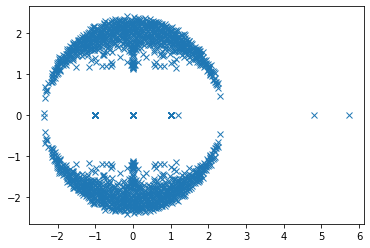

In [31]:
n = 1000
p_in = 12
p_out=  1

cs = np.array([.5,.5])
ns = n*cs
k = len(cs)
j = lambda i : np.concatenate([np.zeros(int(np.sum(ns[:i]))),np.ones(int(ns[i])),np.zeros(int(np.sum(ns[i+1:])))]).reshape(n,1)
J = np.concatenate([j(0),j(1)],1)

C = np.array([[p_in,p_out],[p_out,p_in]])/n
P = np.dot(J,np.dot(C,J.T))

A = np.random.binomial(1,P,(n,n))
A = np.tril(A,-1)+np.tril(A,-1).T

# get the directed edges of A
indices_M = []
for i in range(n):
    if np.sum(A[i,i+1:])>0:
        for j in range(i):
            if A[i,j]>0:
                indices_M.append((i,j))
                indices_M.append((j,i))

N = np.zeros((len(indices_M),len(indices_M)))
for iI,I in enumerate(indices_M):
    for iJ,J in enumerate(indices_M):
        if I[1]==J[0] and I[0]!=J[1]:
            N[iI,iJ]=1

eig_N = np.linalg.eig(N)[0]

_ = plt.plot(np.real(eig_N),np.imag(eig_N),'x')

## Eigenvalue-eigenvector pairs of Bethe Hessian $H_{\gamma}$ under DC-SBM

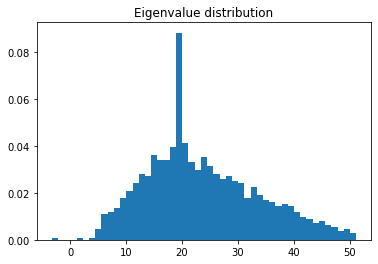

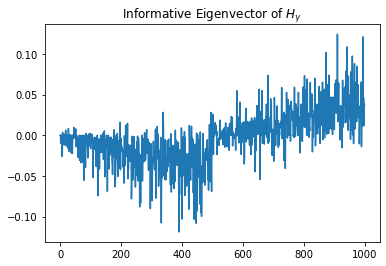

In [37]:
n = 1000
p_in = 35
p_out=  5

cs = np.array([.5,.5])
ns = n*cs
k = len(cs)
j = lambda i : np.concatenate([np.zeros(int(np.sum(ns[:i]))),np.ones(int(ns[i])),np.zeros(int(np.sum(ns[i+1:])))]).reshape(n,1)
J = np.concatenate([j(0),j(1)],1)

q = np.concatenate([np.linspace(.2,.9,n//2),np.linspace(.2,.9,n//2)])
C = np.array([[p_in,p_out],[p_out,p_in]])/n
P = np.multiply(q,np.multiply(q,np.dot(J,np.dot(C,J.T)).T))

A = np.random.binomial(1,P,(n,n))
A = np.tril(A,-1)+np.tril(A,-1).T
d = np.sum(A,0)
                
gamma = np.sqrt( (p_in + p_out )/2)

H = (gamma**2 - 1)*np.eye(n) + np.diag(d) - gamma*A

eigs_H,V_H = np.linalg.eigh(H)
ind = np.argsort(eigs_H)
eigs_H = eigs_H[ind]
V_H = V_H[:,ind]

edges = np.linspace(eigs_H[0],eigs_H[-1],50)

plt.hist(eigs_H,bins=edges,weights=1/n/(edges[1]-edges[0])*np.ones(n),label='Eigenvalue distribution')
_ = plt.title('Eigenvalue distribution')

plt.figure()
plt.plot(V_H[:,1])
_ = plt.title(r'Informative Eigenvector of $H_{\gamma}$')